# Other Variable Correlations

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.spatial import cKDTree
from scipy.stats import spearmanr

import urllib.request
import datetime as dt

import netCDF4
from netCDF4 import Dataset, num2date

from matplotlib import pyplot as plt
%matplotlib inline

## Load the dataset from the csv file

In [2]:
df = pd.read_csv('RAW COMBINED DATA NEW.csv')

## Clean up and pivot the dataframe

In [3]:
df1 = df.drop(columns=['Depth','Latitude','Longitude','median','p5','p95','lowest','highest']).rename(columns={"mean": "Value"}).set_index(["Site Name", "Date"]).pivot(columns="Variable")['Value'].reset_index().rename_axis(None, axis=1)
df1

,Site Name,Date,Chl_a_sum,DIC,DIP,PAR,PH,SST,Salinity,Temp,Total_Nitrogen,WS_u,WS_v
0,Site A,2011-01-01,1.593400,23264.13033,4.593337,0.000044,8.123843,26.472911,35.514774,21.548902,91.066483,-5.584072,1.927125
1,Site A,2011-02-01,1.178931,23201.26594,3.314823,0.000050,8.113303,27.331098,35.478463,22.992727,80.496338,-3.962147,0.944716
2,Site A,2011-03-01,1.019666,23080.68346,4.986534,0.000033,8.088158,27.078977,35.504641,24.553983,97.506236,-3.474723,1.007745
3,Site A,2011-04-01,1.118257,23121.66848,5.616589,0.000026,8.090884,26.040695,35.438912,24.351538,101.215224,-4.370092,4.096774
4,Site A,2011-05-01,0.585132,23280.78416,1.851396,0.000025,8.095257,24.170828,35.496033,23.837653,66.428991,0.448532,3.910924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Site E,2018-08-01,0.394180,23029.49614,1.258282,0.000023,8.097806,25.130686,35.226449,24.860653,58.977623,-6.309957,5.065163
476,Site E,2018-09-01,0.376906,23099.83955,0.730994,0.000036,8.091863,25.073075,35.252890,24.796843,53.927021,-7.234225,5.335747
477,Site E,2018-10-01,0.428957,23005.15362,0.425672,0.000037,8.095646,25.778672,35.310891,24.984308,53.953252,-5.743962,3.482013
478,Site E,2018-11-01,0.532191,23007.50178,0.350171,0.000053,8.083797,27.599377,35.268250,26.037196,53.595734,-4.367141,1.958173


## Create unique dataframes for each site

In [4]:
dfA = df1[(df1['Site Name'] == "Site A")]
dfB = df1[(df1['Site Name'] == "Site B")]
dfC = df1[(df1['Site Name'] == "Site C")]
dfD = df1[(df1['Site Name'] == "Site D")]
dfE = df1[(df1['Site Name'] == "Site E")]

## Create Spearman's correlation matrix for each site

In [5]:
matrixA = dfA.corr(method="spearman")
matrixB = dfB.corr(method="spearman")
matrixC = dfC.corr(method="spearman")
matrixD = dfD.corr(method="spearman")
matrixE = dfE.corr(method="spearman")

## Define new values for temperature correlations based on best time lag

In [6]:
#Site A
matrixA['Chl_a_sum']['Temp']=-0.54
matrixA['Temp']['Chl_a_sum']=-0.54
matrixA['Chl_a_sum']['SST']=-0.55
matrixA['SST']['Chl_a_sum']=-0.55

#Site B
matrixB['Chl_a_sum']['Temp']=-0.59
matrixB['Temp']['Chl_a_sum']=-0.59
matrixB['Chl_a_sum']['SST']=-0.67
matrixB['SST']['Chl_a_sum']=-0.67

#Site C
matrixC['Chl_a_sum']['Temp']=-0.84
matrixC['Temp']['Chl_a_sum']=-0.84
matrixC['Chl_a_sum']['SST']=-0.87
matrixC['SST']['Chl_a_sum']=-0.87

#Site D
matrixD['Chl_a_sum']['Temp']=-0.63
matrixD['Temp']['Chl_a_sum']=-0.63
matrixD['Chl_a_sum']['SST']=-0.68
matrixD['SST']['Chl_a_sum']=-0.68

#Site E
matrixE['Chl_a_sum']['Temp']=-0.42
matrixE['Temp']['Chl_a_sum']=-0.42
matrixE['Chl_a_sum']['SST']=-0.53
matrixE['SST']['Chl_a_sum']=-0.53

## Create colour-coded correlation matrix figure with seaborn for each site

Text(0.5, 1.0, 'Correlation Matrix: Site E')

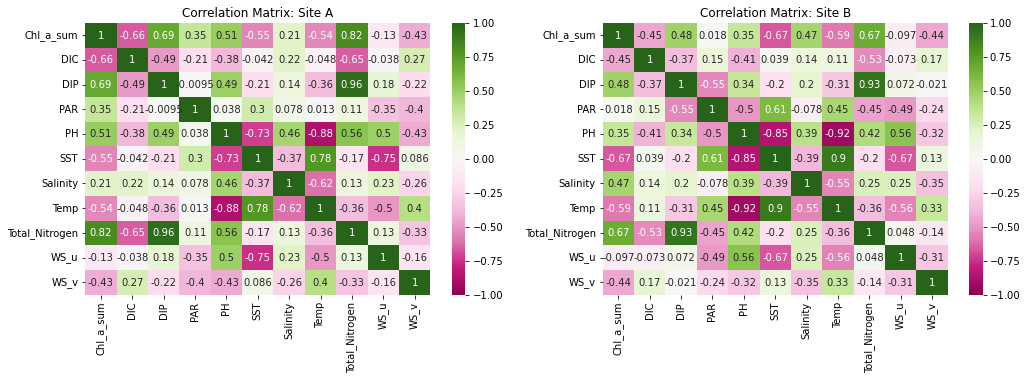

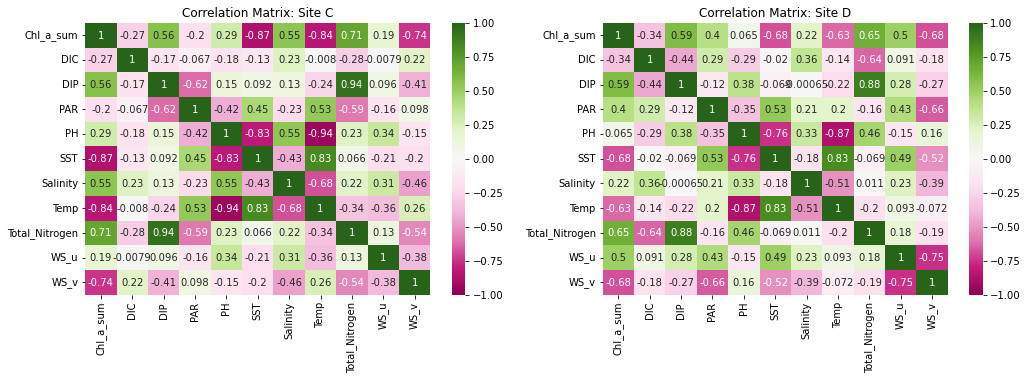

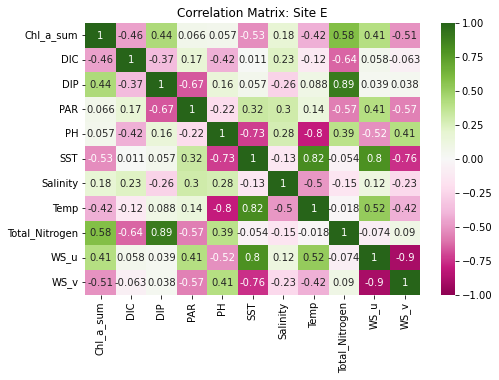

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17, 5))

#Site A
sns.heatmap(matrixA, vmin=-1, vmax=1, annot=True, cmap="PiYG", ax=ax1)
ax1.set_title("Correlation Matrix: Site A")

#Site B
sns.heatmap(matrixB, vmin=-1, vmax=1, annot=True, cmap="PiYG", ax=ax2)
ax2.set_title("Correlation Matrix: Site B")

fig, (ax3, ax4) = plt.subplots(1,2, figsize=(17, 5))

#Site C
sns.heatmap(matrixC, vmin=-1, vmax=1, annot=True, cmap="PiYG", ax=ax3)
ax3.set_title("Correlation Matrix: Site C")

#Site D
sns.heatmap(matrixD, vmin=-1, vmax=1, annot=True, cmap="PiYG", ax=ax4)
ax4.set_title("Correlation Matrix: Site D")


#Site E
fig, ax5 = plt.subplots(figsize=(7.5, 5))
sns.heatmap(matrixE, vmin=-1, vmax=1, annot=True, cmap="PiYG", ax=ax5)
ax5.set_title("Correlation Matrix: Site E")

## Calculate p-values for each matrix

### Site A

In [8]:
def calculate_pvalues(dfA):
    dfA = dfA.dropna()._get_numeric_data()
    dfAcols = pd.DataFrame(columns=dfA.columns)
    pvalues = dfAcols.transpose().join(dfAcols, how='outer')
    for r in dfA.columns:
        for c in dfA.columns:
            pvalues[r][c] = round(spearmanr(dfA[r], dfA[c])[1], 4)
    return pvalues
calculate_pvalues(dfA)

,Chl_a_sum,DIC,DIP,PAR,PH,SST,Salinity,Temp,Total_Nitrogen,WS_u,WS_v
Chl_a_sum,0.0,0.0,0.0,0.0006,0.0,0.5445,0.0381,0.0063,0.0,0.1991,0.0
DIC,0.0,0.0,0.0,0.0406,0.0001,0.6841,0.0333,0.6391,0.0,0.7126,0.0087
DIP,0.0,0.0,0.0,0.9268,0.0,0.041,0.1817,0.0003,0.0,0.0804,0.0327
PAR,0.0006,0.0406,0.9268,0.0,0.7151,0.0035,0.448,0.9035,0.2961,0.0005,0.0001
PH,0.0,0.0001,0.0,0.7151,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SST,0.5445,0.6841,0.041,0.0035,0.0,0.0,0.0002,0.0,0.0995,0.0,0.4022
Salinity,0.0381,0.0333,0.1817,0.448,0.0,0.0002,0.0,0.0,0.2163,0.0268,0.0116
Temp,0.0063,0.6391,0.0003,0.9035,0.0,0.0,0.0,0.0,0.0004,0.0,0.0
Total_Nitrogen,0.0,0.0,0.0,0.2961,0.0,0.0995,0.2163,0.0004,0.0,0.2138,0.001
WS_u,0.1991,0.7126,0.0804,0.0005,0.0,0.0,0.0268,0.0,0.2138,0.0,0.1296


### Site B

In [9]:
def calculate_pvalues(dfB):
    dfB = dfB.dropna()._get_numeric_data()
    dfBcols = pd.DataFrame(columns=dfB.columns)
    pvalues = dfBcols.transpose().join(dfBcols, how='outer')
    for r in dfB.columns:
        for c in dfB.columns:
            pvalues[r][c] = round(spearmanr(dfB[r], dfB[c])[1], 4)
    return pvalues
calculate_pvalues(dfB)

,Chl_a_sum,DIC,DIP,PAR,PH,SST,Salinity,Temp,Total_Nitrogen,WS_u,WS_v
Chl_a_sum,0.0,0.0,0.0,0.8613,0.0005,0.9607,0.0,0.0025,0.0,0.3481,0.0
DIC,0.0,0.0,0.0003,0.1387,0.0,0.7059,0.1596,0.2728,0.0,0.4774,0.0915
DIP,0.0,0.0003,0.0,0.0,0.0008,0.0486,0.0516,0.0023,0.0,0.4854,0.8385
PAR,0.8613,0.1387,0.0,0.0,0.0,0.0,0.4523,0.0,0.0,0.0,0.0211
PH,0.0005,0.0,0.0008,0.0,0.0,0.0,0.0001,0.0,0.0,0.0,0.0016
SST,0.9607,0.7059,0.0486,0.0,0.0,0.0,0.0001,0.0,0.0523,0.0,0.2103
Salinity,0.0,0.1596,0.0516,0.4523,0.0001,0.0001,0.0,0.0,0.0134,0.0142,0.0005
Temp,0.0025,0.2728,0.0023,0.0,0.0,0.0,0.0,0.0,0.0003,0.0,0.0009
Total_Nitrogen,0.0,0.0,0.0,0.0,0.0,0.0523,0.0134,0.0003,0.0,0.641,0.1643
WS_u,0.3481,0.4774,0.4854,0.0,0.0,0.0,0.0142,0.0,0.641,0.0,0.0018


### Site C

In [10]:
def calculate_pvalues(dfC):
    dfC = dfC.dropna()._get_numeric_data()
    dfCcols = pd.DataFrame(columns=dfC.columns)
    pvalues = dfCcols.transpose().join(dfCcols, how='outer')
    for r in dfC.columns:
        for c in dfC.columns:
            pvalues[r][c] = round(spearmanr(dfC[r], dfC[c])[1], 4)
    return pvalues
calculate_pvalues(dfC)

,Chl_a_sum,DIC,DIP,PAR,PH,SST,Salinity,Temp,Total_Nitrogen,WS_u,WS_v
Chl_a_sum,0.0,0.0074,0.0,0.0551,0.004,0.4064,0.0,0.0001,0.0,0.0584,0.0
DIC,0.0074,0.0,0.0899,0.5196,0.0876,0.195,0.0216,0.9385,0.0051,0.9393,0.031
DIP,0.0,0.0899,0.0,0.0,0.1485,0.3709,0.211,0.017,0.0,0.3542,0.0
PAR,0.0551,0.5196,0.0,0.0,0.0,0.0,0.0265,0.0,0.0,0.1178,0.3434
PH,0.004,0.0876,0.1485,0.0,0.0,0.0,0.0,0.0,0.0232,0.0006,0.1478
SST,0.4064,0.195,0.3709,0.0,0.0,0.0,0.0,0.0,0.5211,0.0418,0.0535
Salinity,0.0,0.0216,0.211,0.0265,0.0,0.0,0.0,0.0,0.0323,0.0019,0.0
Temp,0.0001,0.9385,0.017,0.0,0.0,0.0,0.0,0.0,0.0007,0.0003,0.011
Total_Nitrogen,0.0,0.0051,0.0,0.0,0.0232,0.5211,0.0323,0.0007,0.0,0.2047,0.0
WS_u,0.0584,0.9393,0.3542,0.1178,0.0006,0.0418,0.0019,0.0003,0.2047,0.0,0.0002


### Site D

In [11]:
def calculate_pvalues(dfD):
    dfD = dfD.dropna()._get_numeric_data()
    dfDcols = pd.DataFrame(columns=dfD.columns)
    pvalues = dfDcols.transpose().join(dfDcols, how='outer')
    for r in dfD.columns:
        for c in dfD.columns:
            pvalues[r][c] = round(spearmanr(dfD[r], dfD[c])[1], 4)
    return pvalues
calculate_pvalues(dfD)

,Chl_a_sum,DIC,DIP,PAR,PH,SST,Salinity,Temp,Total_Nitrogen,WS_u,WS_v
Chl_a_sum,0.0,0.0007,0.0,0.0001,0.5284,0.0,0.0292,0.3677,0.0,0.0,0.0
DIC,0.0007,0.0,0.0,0.004,0.0037,0.8461,0.0003,0.1684,0.0,0.3789,0.0719
DIP,0.0,0.0,0.0,0.231,0.0001,0.5053,0.995,0.0278,0.0,0.0062,0.0077
PAR,0.0001,0.004,0.231,0.0,0.0005,0.0,0.0393,0.0451,0.1131,0.0,0.0
PH,0.5284,0.0037,0.0001,0.0005,0.0,0.0,0.0012,0.0,0.0,0.156,0.1107
SST,0.0,0.8461,0.5053,0.0,0.0,0.0,0.086,0.0,0.5058,0.0,0.0
Salinity,0.0292,0.0003,0.995,0.0393,0.0012,0.086,0.0,0.0,0.9176,0.0219,0.0001
Temp,0.3677,0.1684,0.0278,0.0451,0.0,0.0,0.0,0.0,0.0547,0.3661,0.4851
Total_Nitrogen,0.0,0.0,0.0,0.1131,0.0,0.5058,0.9176,0.0547,0.0,0.084,0.0653
WS_u,0.0,0.3789,0.0062,0.0,0.156,0.0,0.0219,0.3661,0.084,0.0,0.0


### Site E

In [12]:
def calculate_pvalues(dfE):
    dfE = dfE.dropna()._get_numeric_data()
    dfEcols = pd.DataFrame(columns=dfE.columns)
    pvalues = dfEcols.transpose().join(dfEcols, how='outer')
    for r in dfE.columns:
        for c in dfE.columns:
            pvalues[r][c] = round(spearmanr(dfE[r], dfE[c])[1], 4)
    return pvalues
calculate_pvalues(dfE)

,Chl_a_sum,DIC,DIP,PAR,PH,SST,Salinity,Temp,Total_Nitrogen,WS_u,WS_v
Chl_a_sum,0.0,0.0,0.0,0.521,0.5823,0.0,0.0812,0.0225,0.0,0.0,0.0
DIC,0.0,0.0,0.0002,0.104,0.0,0.9129,0.0234,0.2344,0.0,0.5741,0.5393
DIP,0.0,0.0002,0.0,0.0,0.1309,0.5833,0.0104,0.3955,0.0,0.7091,0.7141
PAR,0.521,0.104,0.0,0.0,0.0354,0.0014,0.0033,0.1868,0.0,0.0,0.0
PH,0.5823,0.0,0.1309,0.0354,0.0,0.0,0.006,0.0,0.0001,0.0,0.0
SST,0.0,0.9129,0.5833,0.0014,0.0,0.0,0.1943,0.0,0.6042,0.0,0.0
Salinity,0.0812,0.0234,0.0104,0.0033,0.006,0.1943,0.0,0.0,0.1467,0.2527,0.0222
Temp,0.0225,0.2344,0.3955,0.1868,0.0,0.0,0.0,0.0,0.8642,0.0,0.0
Total_Nitrogen,0.0,0.0,0.0,0.0,0.0001,0.6042,0.1467,0.8642,0.0,0.476,0.3821
WS_u,0.0,0.5741,0.7091,0.0,0.0,0.0,0.2527,0.0,0.476,0.0,0.0
